In [ ]:
# Data Preperation
# This is the shared notebook for our project. It contains the code for the data preprocessing, the model training.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import io

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [31]:
# Load the claims data
data = pd.read_csv('claims_data.csv')

# View the first few rows of the dataset
data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [32]:
# Check the data types of each column
data.info()

# Check for missing values
data.isnull().sum()

# Summary statistics for numerical columns
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


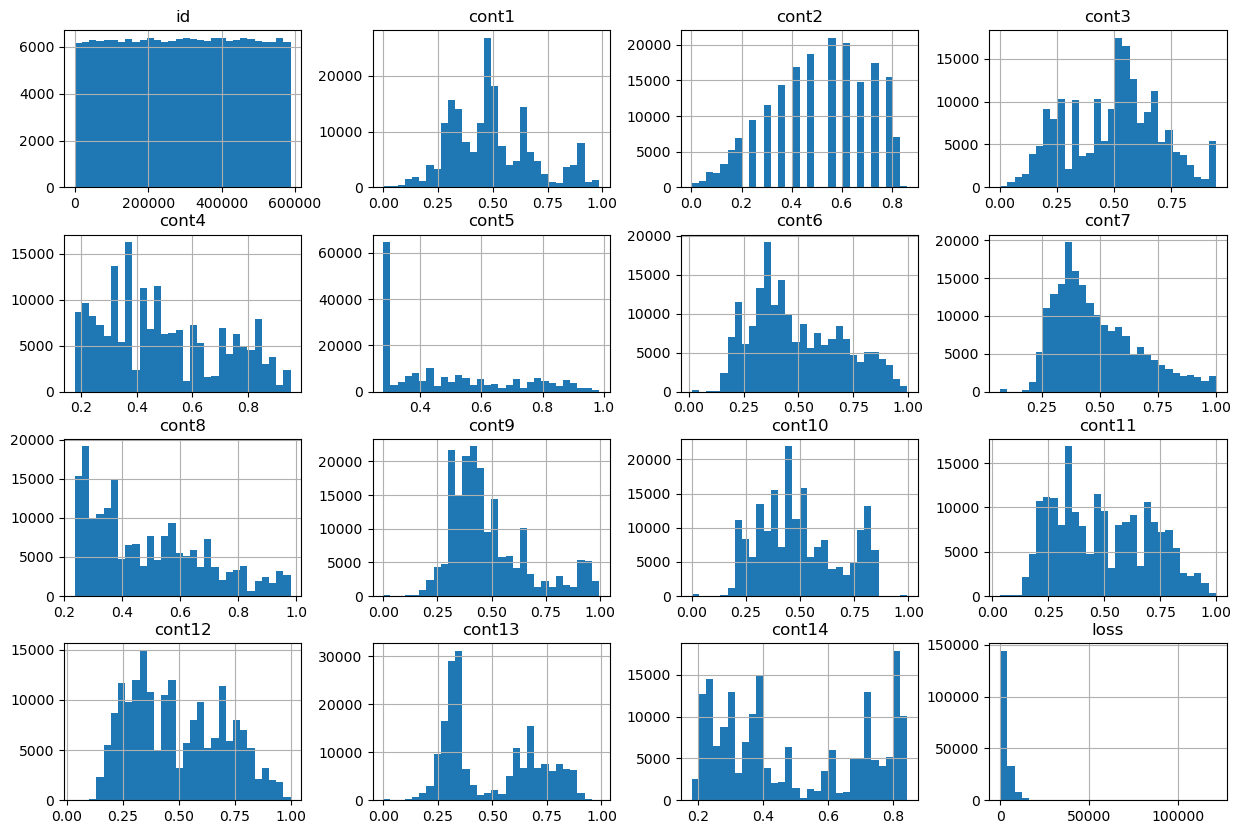

In [33]:
# Visuualizing Data: Understand the distribution of the data
# Plot histograms for numerical columns
data.hist(bins=30, figsize=(15, 10))
plt.show()

In [34]:
# Determine which categorical values cannot be converted to boolean data
categorical = [x for x in data.columns if set(pd.unique(data[x])) != {'A', 'B'} and 'cat' in x]
categorical

['cat73',
 'cat74',
 'cat75',
 'cat76',
 'cat77',
 'cat78',
 'cat79',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat88',
 'cat89',
 'cat90',
 'cat91',
 'cat92',
 'cat93',
 'cat94',
 'cat95',
 'cat96',
 'cat97',
 'cat98',
 'cat99',
 'cat100',
 'cat101',
 'cat102',
 'cat103',
 'cat104',
 'cat105',
 'cat106',
 'cat107',
 'cat108',
 'cat109',
 'cat110',
 'cat111',
 'cat112',
 'cat113',
 'cat114',
 'cat115',
 'cat116']

In [35]:
# One-hot encoding function 
def process_cat(data, cat_features):
    for cat in cat_features:
        # One-hot encode the categorical feature
        data_cat = pd.get_dummies(data[cat], prefix=cat)
        
        # Join the new one-hot encoded columns with the original data
        data = data.join(data_cat)
        
        # Drop the original categorical columns
        data.drop(columns=cat, inplace=True)
    
    return data

data = process_cat(data, categorical)

In [37]:
# Convert other categorical data into boolean data
for i in range(1, 73):
    data['cat' + str(i)] = data['cat' + str(i)].replace({'A': True, 'B': False})

data

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y
0,1,1,0,1,0,1,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
1,2,1,0,1,1,1,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
2,5,1,0,1,1,0,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
3,10,0,0,1,0,1,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
4,11,1,0,1,0,1,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,587620,1,0,1,1,1,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
188314,587624,1,1,1,1,1,0,1,1,1,...,False,False,False,False,False,False,False,False,False,False
188315,587630,1,0,1,1,1,1,1,0,0,...,False,False,False,False,False,False,False,False,False,False
188316,587632,1,0,1,1,1,1,1,1,0,...,False,False,False,False,False,False,False,False,False,False
